# 1.5)

In [135]:

import pandas as pd
import sns
from sklearn.model_selection import train_test_split

In [136]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv("pvtest.csv")
df["Time"] = pd.to_datetime(df["Time"])

werte = ['Edaily', 'Dci', 'Dcp', 'Dcu', 'Temp1']
X = df[werte].copy()

X.index = df['Time']

target_col_idx = 2

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Numpy Array

# --- Aufgabe b)
train_size = int(len(X_scaled) * 0.8)

# Arrays nutzen Slicing mit [], kein .iloc
x_train_data = X_scaled[:train_size]
x_test_data = X_scaled[train_size:]

X.head()


C:\Users\Malte\AppData\Local\Temp\ipykernel_12952\1094911295.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Time"] = pd.to_datetime(df["Time"])


,Edaily,Dci,Dcp,Dcu,Temp1
Time,,,,,
2021-01-20 07:45:00,0.0,0.0,0,0,0.0
2021-01-20 07:50:00,0.0,0.0,0,0,0.0
2021-01-20 07:55:00,0.0,0.0,0,0,0.0
2021-01-20 08:00:00,0.0,0.0,0,0,0.0
2021-01-20 08:05:00,0.0,0.0,0,0,0.0



# c)

In [137]:

windows_size = 36

In [138]:
def restructure_dat(dataset, target_idx, window_size):
	X_, Y_ = [], []

	for i in range(len(dataset) - window_size):
		window = dataset[i: i + window_size, :]
		X_.append(window)

		label = dataset[i + window_size, target_idx]
		Y_.append(label)

	return np.array(X_), np.array(Y_)

In [139]:

# Funktion aufrufen
X_train, y_train = restructure_dat(x_train_data, target_col_idx, windows_size)
X_test, y_test = restructure_dat(x_test_data, target_col_idx, windows_size)

print("Training Shape:")
print(f"Input X: {X_train.shape} (Samples, Zeitschritte, Features)")
print(f"Target y: {y_train.shape} (Samples, 1 Wert)")

Training Shape:
Input X: (2800, 36, 5) (Samples, Zeitschritte, Features)
Target y: (2800,) (Samples, 1 Wert)


# D)

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(InputLayer(shape=(windows_size, 5)))

model.add(LSTM(units=50, dropout=0.2,return_sequences=False))

model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
)

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3689 - mae: 0.3315 - val_loss: 0.0343 - val_mae: 0.0977
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1922 - mae: 0.2441 - val_loss: 0.0299 - val_mae: 0.0815
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1765 - mae: 0.2352 - val_loss: 0.0287 - val_mae: 0.0831
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1770 - mae: 0.2205 - val_loss: 0.0278 - val_mae: 0.0829
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1313 - mae: 0.2017 - val_loss: 0.0246 - val_mae: 0.0857
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1592 - mae: 0.2093 - val_loss: 0.0233 - val_mae: 0.0742
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1502 - mae: 0.1982 - val_loss: 0.0237 - val_mae: 0.0889
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1521 - mae: 0.1986 - val_loss: 0.0259 - val_mae: 0.1009
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.12

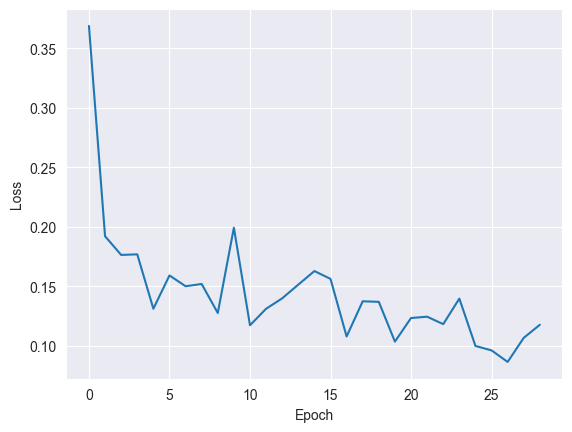

In [142]:


plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.plot(history.history['loss'])

In [143]:
#x_test.head()


In [144]:
y_pred_scaled = model.predict(X_test)

# Create dummy matrix to satisfy the Scaler's shape requirement (5 columns)
dummy = np.zeros((len(y_pred_scaled), X.shape[1]))
dummy[:, target_col_idx] = y_pred_scaled.flatten()

# Inverse transform
y_pred_inv = scaler.inverse_transform(dummy)[:, target_col_idx]

# Do the same for y_test to compare
y_test_inv = np.zeros((len(y_test), X.shape[1]))
y_test_inv[:, target_col_idx] = y_test.flatten()
y_true_real = scaler.inverse_transform(y_test_inv)[:, target_col_idx]

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


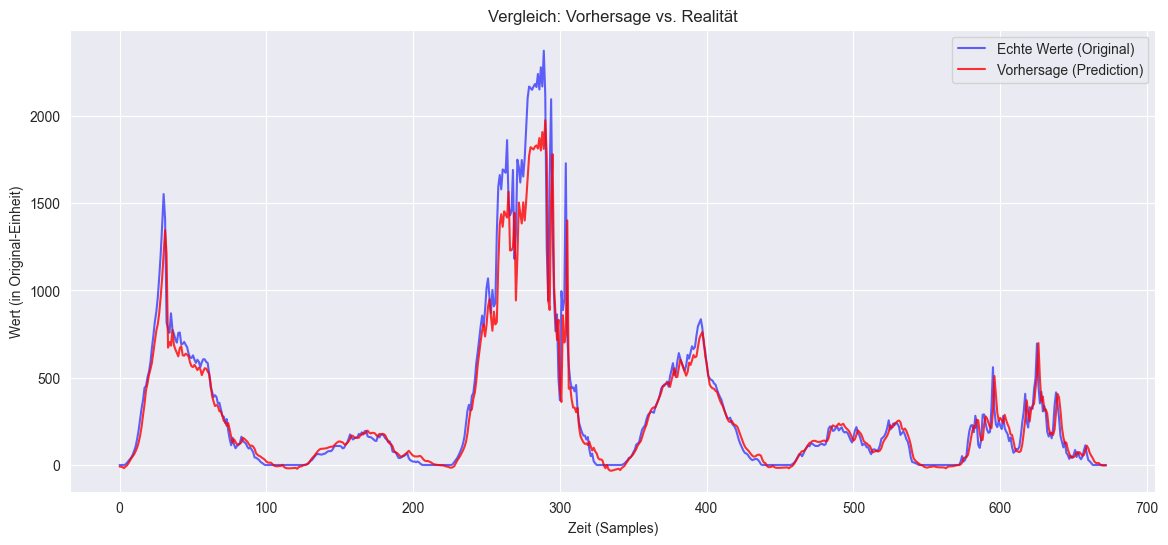

In [145]:
# Plot-Größe festlegen
plt.figure(figsize=(14, 6))

# Echtdaten (Original)
plt.plot(y_true_real, color='blue', label='Echte Werte (Original)', alpha=0.6)

# Vorhersage (Prediction)
plt.plot(y_pred_inv, color='red', label='Vorhersage (Prediction)', alpha=0.8)

plt.title('Vergleich: Vorhersage vs. Realität')
plt.xlabel('Zeit (Samples)')
plt.ylabel('Wert (in Original-Einheit)')
plt.legend()
plt.show()

In [146]:

from sklearn.metrics import mean_absolute_error

mae_day = mean_absolute_error(y_true_real, y_pred_inv)
print('mae, model predictions {:.3f}'.format(mae_day))


mae, model predictions 58.296
